In [1]:
import numpy as np
import matplotlib.pyplot as pp
import scipy.io.wavfile as wav
from scipy.fft import fft, ifft, fftfreq

(0.0, 0.01)

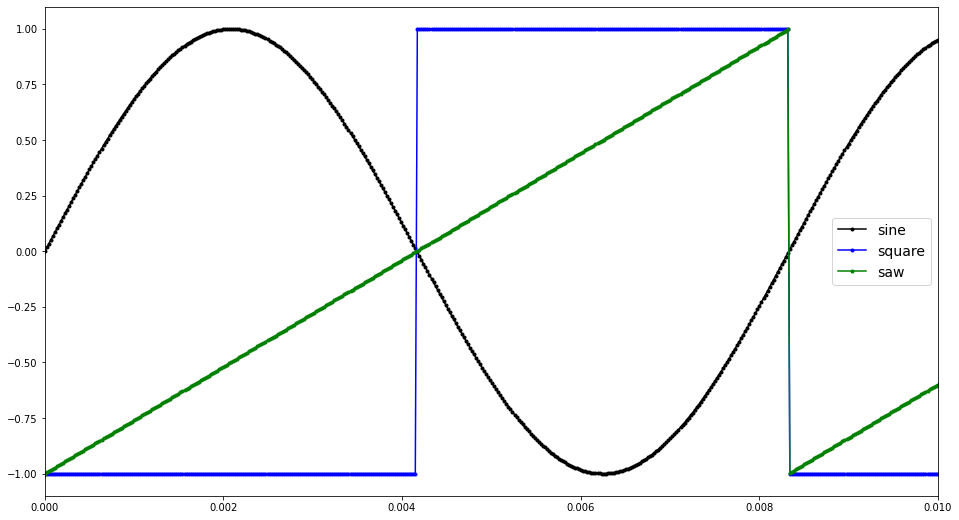

In [7]:
sr = 44100
t = np.arange(0,2,1/sr)
x = np.sin(2*np.pi * 120 * t)          # 120 Hz sine wave
y = np.round(np.mod(120 * t, 1))*2-1   # 120 Hz square wave
z = np.mod(120*t,1)*2-1                # 120 Hz sawtooth
pp.figure(figsize=(16,9))
pp.plot(t,x,'k.-', t, y, 'b.-', t, z, 'g.-')
pp.legend(["sine", "square", "saw"], fontsize=14)
pp.xlim([0,0.01])

(0.01, 10000000000.0)

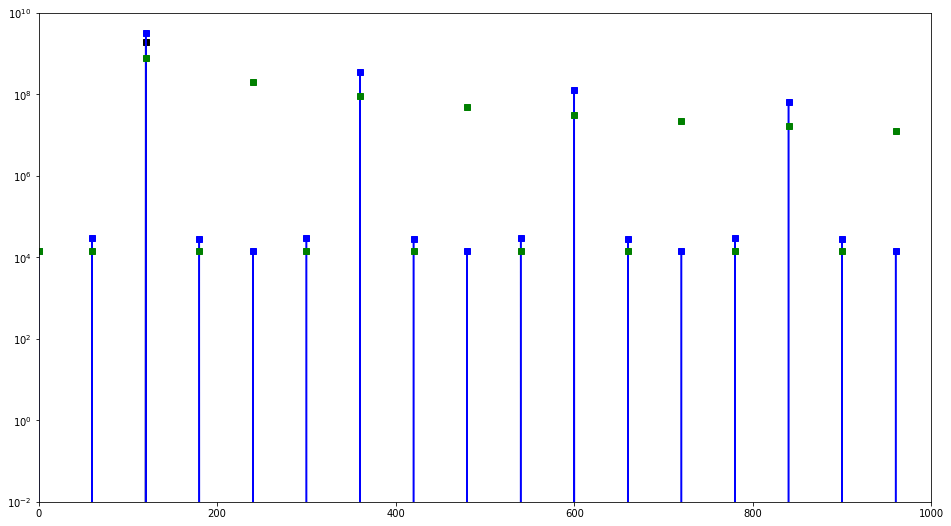

In [32]:
freq = fftfreq(len(x), 1/sr)
fx = fft(x)
fy = fft(y)
fz = fft(z)
pp.figure(figsize=(16,9))
pp.plot(freq, abs(fx**2), 'ks-', freq, abs(fy**2), 'bs-', freq, abs(fz**2), 'gs')
pp.xlim([0,1000])
pp.yscale("log")
pp.ylim([1e-2,1e10])

(0.0, 0.01)

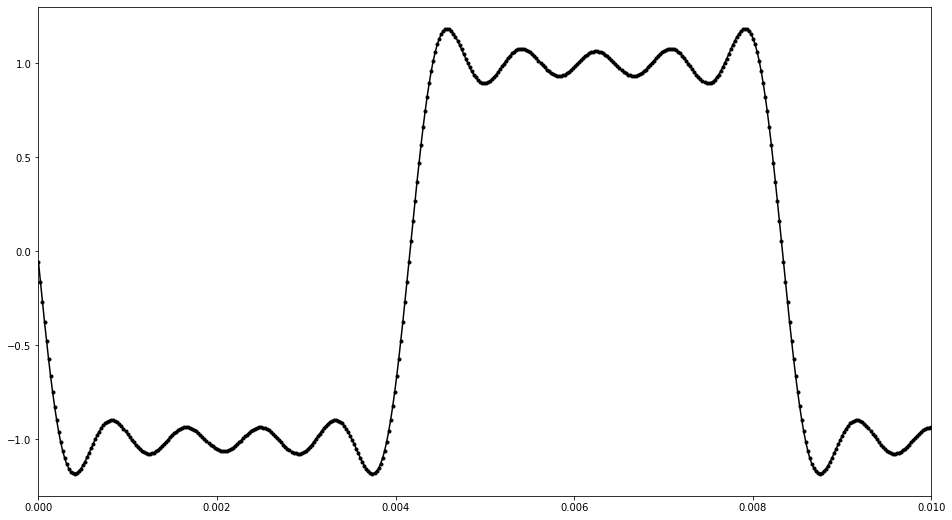

In [46]:
newfy = fy
newfy[abs(freq) > 1200] = 0
newy = np.real(ifft(newfy))
pp.figure(figsize=(16,9))
pp.plot(t,newy, 'k.-')
pp.xlim([0,0.01])

(0.0, 0.01)

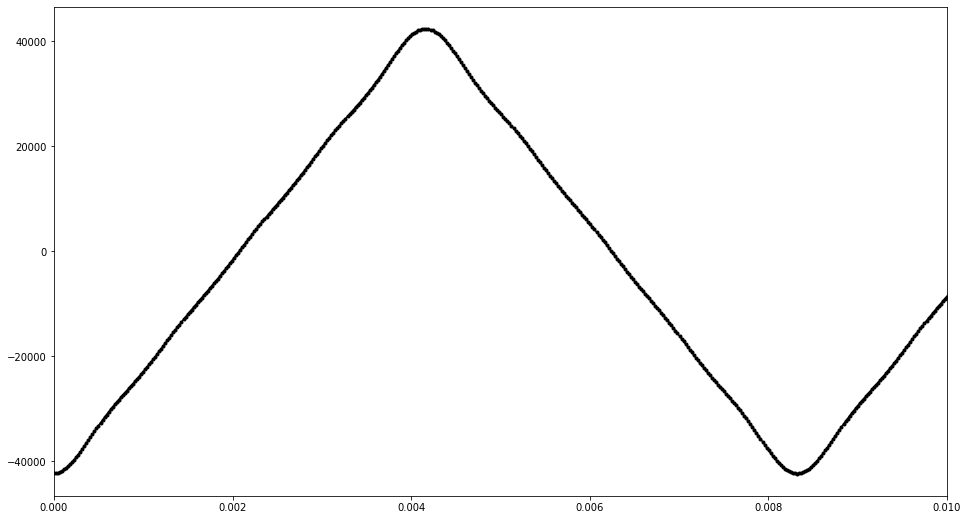

In [47]:
conv = np.real(ifft(fy*fz))
pp.figure(figsize=(16,9))
pp.plot(t,conv, 'k.-')
pp.xlim([0,0.01])

In [21]:
cat = pp.imread("bullet_cat.png")
print(np.shape(cat))

(300, 300, 4)


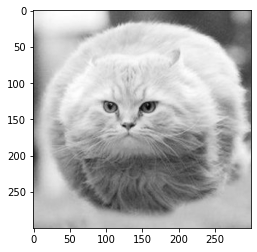

In [22]:
cat = np.sum(cat, 2)
pp.imshow(cat, cmap="gray")

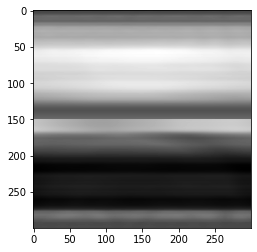

In [28]:
scat = np.roll(-cat, (150,150), axis=(0,1))
supercat = np.real(ifft(fft(scat)*fft(scat)))
pp.imshow(-supercat, cmap="gray")